#  Import Libraries & Load Dataset

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, learning_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

''' Load data '''
df = pd.read_csv("C:\\Users\\Kavi\\Downloads\\train.csv\\train.csv")
df.head()


,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


##  Basic EDA

In [49]:
#Descriptive statistics and info
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       29947 non-null  object 
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 25424 non-null  float64
 5   Income Stability             28317 non-null  object 
 6   Profession                   30000 non-null  object 
 7   Type of Employment           22730 non-null  object 
 8   Location                     30000 non-null  object 
 9   Loan Amount Request (USD)    30000 non-null  float64
 10  Current Loan Expenses (USD)  29828 non-null  float64
 11  Expense Type 1               30000 non-null  object 
 12  Expense Type 2               30000 non-null  object 
 13  Dependents      

None

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD)
count,30000.000000,2.542400e+04,30000.000000,29828.000000,27507.000000,28297.000000,30000.000000,30000.000000,2.515000e+04,30000.000000,30000.000000,3.000000e+04,29660.000000
mean,40.092300,2.630574e+03,88826.333855,400.936876,2.253027,739.885381,0.193933,501.934700,2.631119e+03,2.460067,-4.743867,1.317597e+05,47649.342208
std,16.045129,1.126272e+04,59536.949605,242.545375,0.951162,72.163846,0.395384,288.158086,1.132268e+04,1.118562,74.614593,9.354955e+04,48221.146686
min,18.000000,3.777000e+02,6048.240000,-999.000000,1.000000,580.000000,0.000000,1.000000,3.777000e+02,1.000000,-999.000000,-9.990000e+02,-999.000000
25%,25.000000,1.650457e+03,41177.755000,247.667500,2.000000,681.880000,0.000000,251.000000,1.650450e+03,1.000000,1.000000,6.057216e+04,0.000000
50%,40.000000,2.222435e+03,75128.075000,375.205000,2.000000,739.820000,0.000000,504.000000,2.223250e+03,2.000000,1.000000,1.099936e+05,35209.395000
75%,55.000000,3.090593e+03,119964.605000,521.292500,3.000000,799.120000,0.000000,751.000000,3.091408e+03,3.000000,1.000000,1.788807e+05,74261.250000
max,65.000000,1.777460e+06,621497.820000,3840.880000,14.000000,896.260000,1.000000,999.000000,1.777460e+06,4.000000,1.000000,1.077967e+06,481907.320000


In [50]:
# Counting null values across each features
df.isnull().sum()

Customer ID                       0
Name                              0
Gender                           53
Age                               0
Income (USD)                   4576
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64

## Exploratory Data Analysis

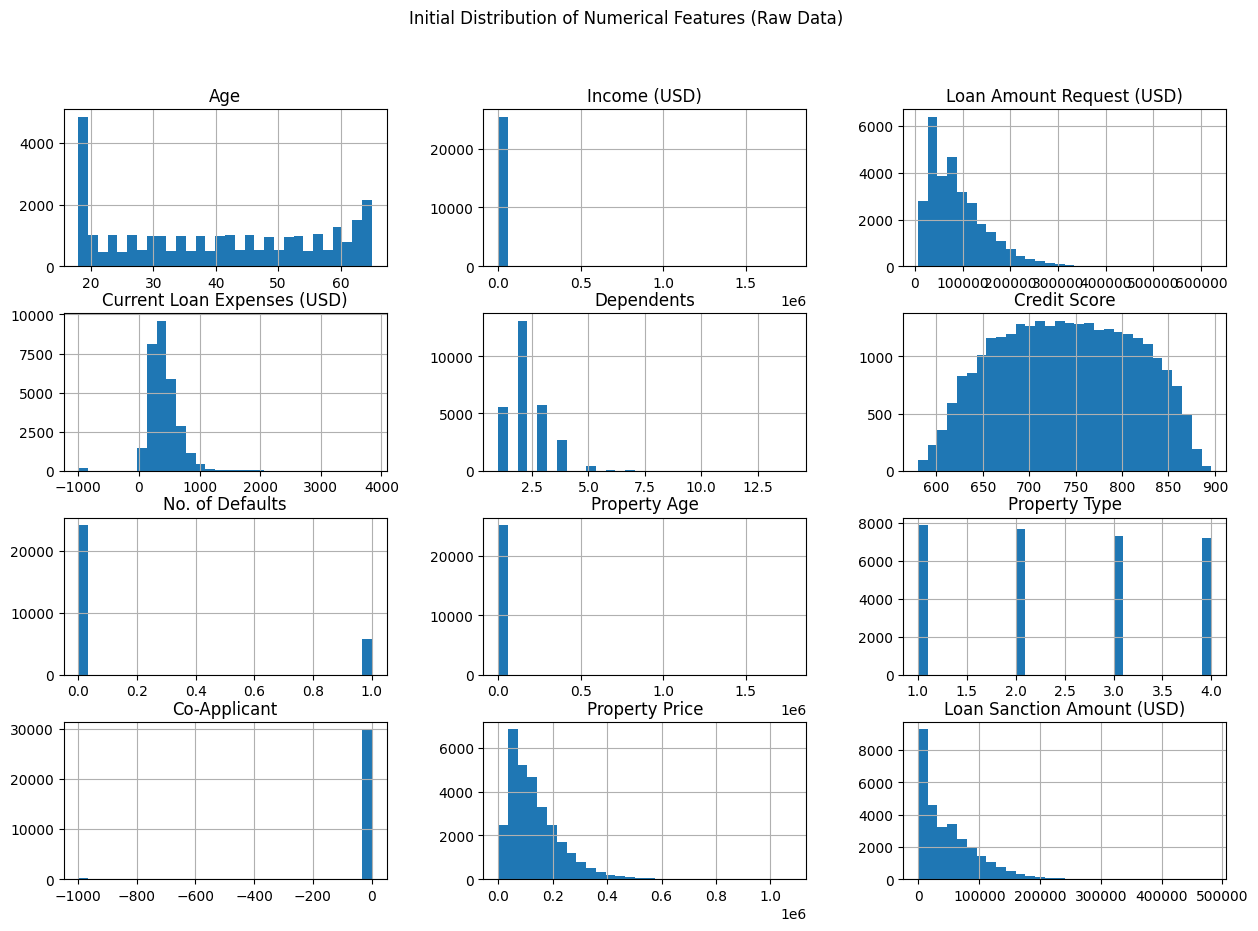

In [51]:
# Drop unrequired columns
df.drop(['Customer ID', 'Name', 'Property ID'], axis=1, inplace=True)

# Visualize numeric feature distributions
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols].hist(figsize=(15, 10), bins=30)
plt.suptitle("Initial Distribution of Numerical Features (Raw Data)")
plt.show()


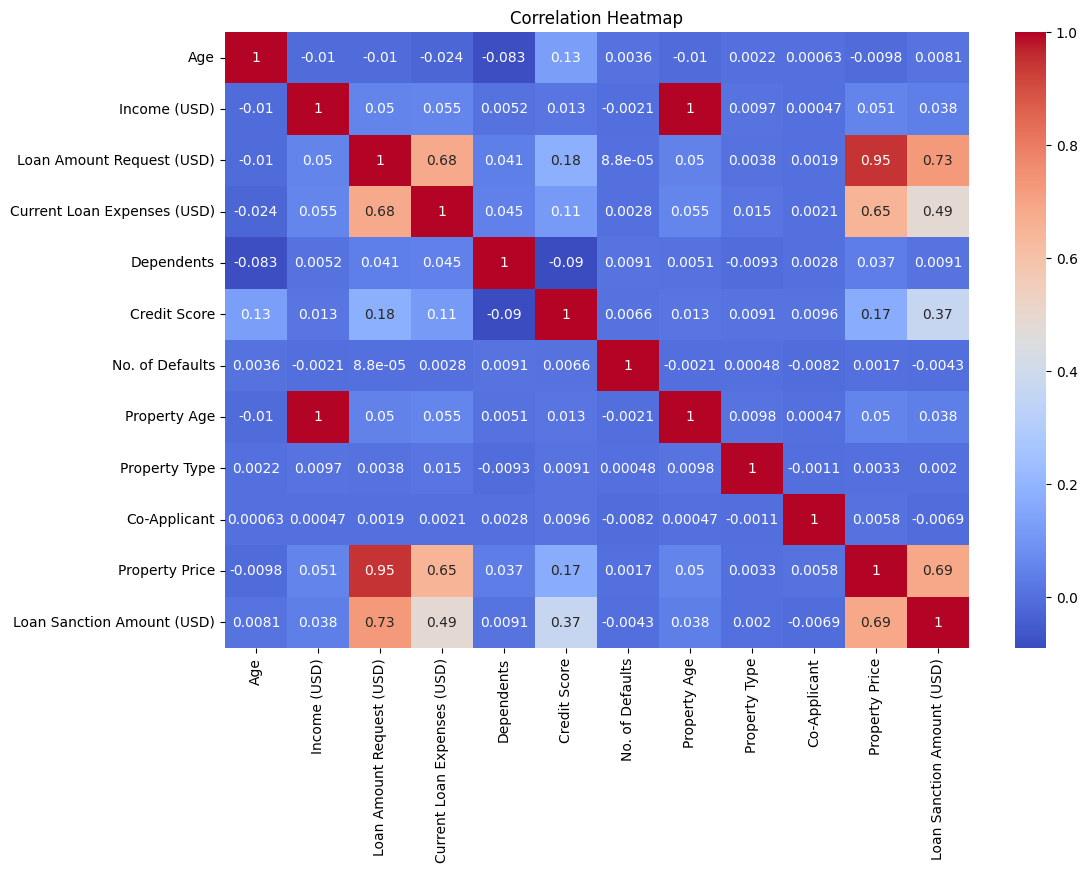

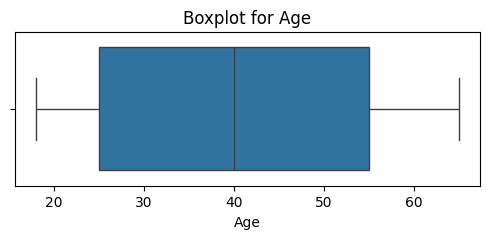

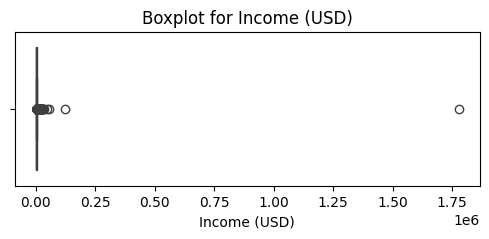

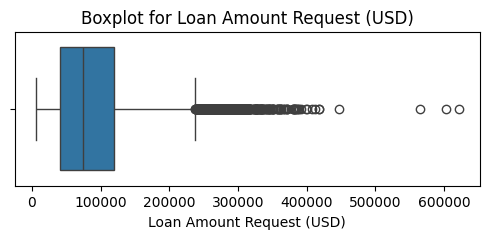

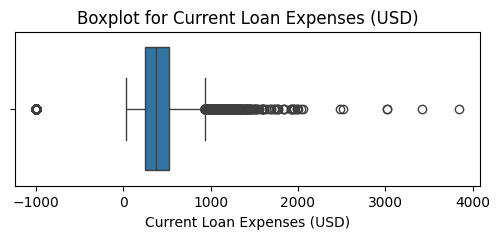

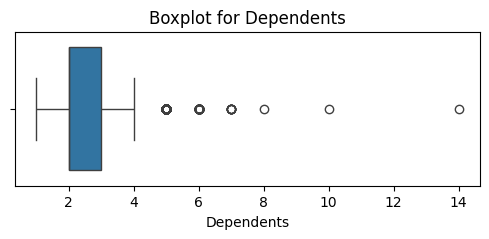

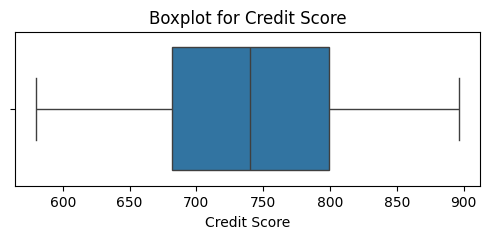

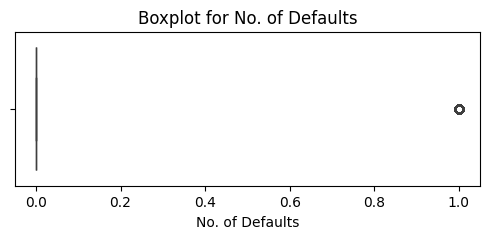

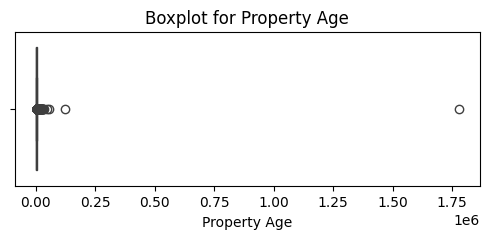

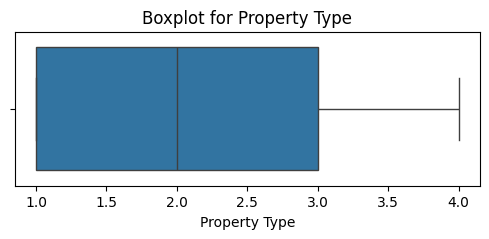

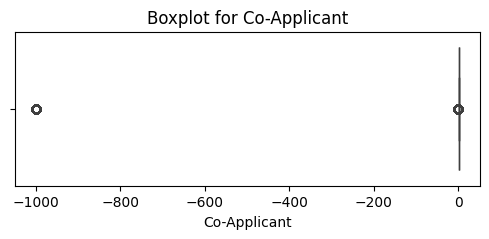

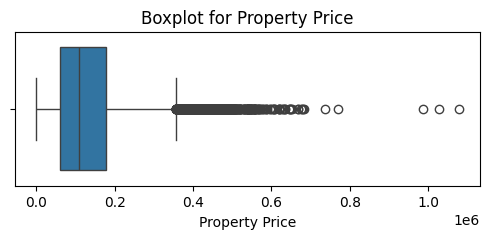

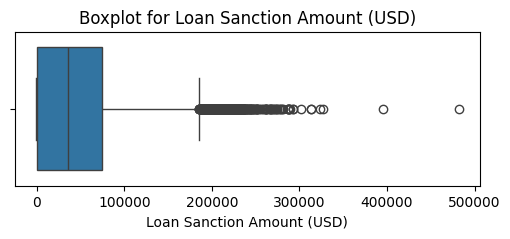

In [52]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

''' Boxplots for outlier detection '''
num_cols = df.select_dtypes(include=['int64','float64']).columns
for col in num_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot for {col}")
    plt.show()


In [53]:
# Outlier removal using IQR method
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


##  Data Cleaning & Preprocessing

In [54]:
''' Recompute column types after dropping '''
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()
ordinal_cols = ['Income Stability', 'Location', 'Has Active Credit Card',
                'Expense Type 1', 'Expense Type 2']
cat_cols = [col for col in cat_cols if col not in ordinal_cols]

# Remove target from numerical columns
num_cols.remove('Loan Sanction Amount (USD)')

df = df[df['Loan Sanction Amount (USD)'] > 0].reset_index(drop=True)

# Define X and y
X = df.drop('Loan Sanction Amount (USD)', axis=1)
y = df['Loan Sanction Amount (USD)']

# Define transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])


ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder())
])

# Update categorical transformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('ord', ordinal_transformer, ordinal_cols),
    ('cat', categorical_transformer, list(set(cat_cols) - set(ordinal_cols)))
])


## 🤖 Model Building with KFold + GridSearchCV

In [55]:

'''
# Define models & parameters
models = {
    'LinearRegression': (LinearRegression(), {}),
    'Ridge': (Ridge(), {'alpha': [0.1, 1.0, 10.0]}),
    'Lasso': (Lasso(), {'alpha': [0.01, 0.1, 1.0]}),
    'RandomForest': (RandomForestRegressor(random_state=42), {'n_estimators': [50, 100], 'max_depth': [None, 10, 20]})
}

best_models = {}
results = {}

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for name, (model, params) in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', model)])
    grid = GridSearchCV(pipe, param_grid={'regressor__' + k: v for k, v in params.items()}, cv=kfold, scoring='r2', n_jobs=-1)
    grid.fit(X, y)
    best_models[name] = grid.best_estimator_
    results[name] = {
        'Best Score': grid.best_score_,
        'Best Params': grid.best_params_
    }

results'''


"\n# Define models & parameters\nmodels = {\n    'LinearRegression': (LinearRegression(), {}),\n    'Ridge': (Ridge(), {'alpha': [0.1, 1.0, 10.0]}),\n    'Lasso': (Lasso(), {'alpha': [0.01, 0.1, 1.0]}),\n    'RandomForest': (RandomForestRegressor(random_state=42), {'n_estimators': [50, 100], 'max_depth': [None, 10, 20]})\n}\n\nbest_models = {}\nresults = {}\n\nkfold = KFold(n_splits=5, shuffle=True, random_state=42)\n\nfor name, (model, params) in models.items():\n    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', model)])\n    grid = GridSearchCV(pipe, param_grid={'regressor__' + k: v for k, v in params.items()}, cv=kfold, scoring='r2', n_jobs=-1)\n    grid.fit(X, y)\n    best_models[name] = grid.best_estimator_\n    results[name] = {\n        'Best Score': grid.best_score_,\n        'Best Params': grid.best_params_\n    }\n\nresults"

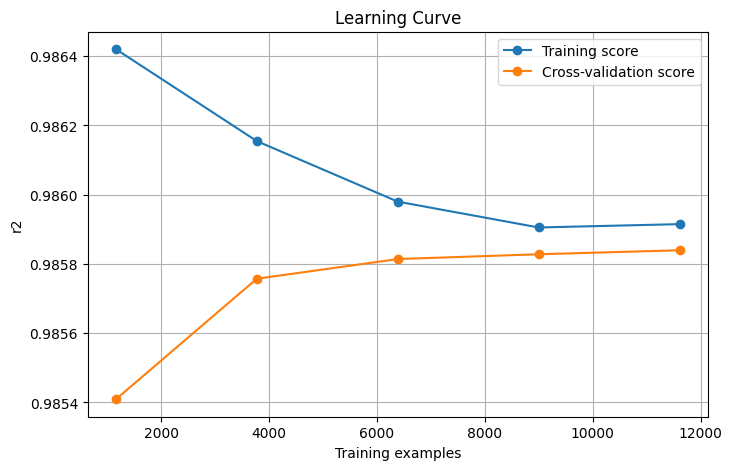

In [56]:
# Plot learning curve
from joblib import parallel_backend


def plot_learning_curve(estimator, X, y, title="Learning Curve", cv=5, scoring="r2"):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 5), shuffle=True, random_state=42)

    train_scores_mean = np.mean(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)

    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, train_scores_mean, 'o-', label="Training score")
    plt.plot(train_sizes, val_scores_mean, 'o-', label="Cross-validation score")
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Example usage with Linear Regression
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("regressor", LinearRegression())])
with parallel_backend('threading', n_jobs=-1):
    plot_learning_curve(model, X, y)

In [57]:
''' Define the full pipeline '''
pipeline = Pipeline(steps=[('preprocessor', preprocessor),('regressor', LinearRegression())])

''' K-Fold CV '''
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = []
mae_scores = []
mse_scores = []
rmse_scores = []
for train_idx, val_idx in kfold.split(X):
    X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
    y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]
    
    pipeline.fit(X_train_fold, y_train_fold)
    y_pred = pipeline.predict(X_val_fold)
    
    mae = mean_absolute_error(y_val_fold,y_pred)
    mse = mean_squared_error(y_val_fold,y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val_fold, y_pred)
    print(f'MAE : {mae:.2f} , MSE : {mse:.2f} , RMSE : {rmse:.2f} , R2 : {r2:.2f}')
    scores.append(r2)
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)

print(f"Average R² across 5 folds: {np.mean(scores):.4f}")
print(f"Average MAE across 5 folds: {np.mean(mae_scores):.4f}")
print(f"Average MSE across 5 folds: {np.mean(mse_scores):.4f}")
print(f"Average RMSE across 5 folds: {np.mean(rmse_scores):.4f}")

MAE : 3129.42 , MSE : 18551597.73 , RMSE : 4307.16 , R2 : 0.99
MAE : 3079.05 , MSE : 18188836.99 , RMSE : 4264.84 , R2 : 0.99
MAE : 3115.78 , MSE : 18223159.98 , RMSE : 4268.86 , R2 : 0.99
MAE : 3152.64 , MSE : 18691139.54 , RMSE : 4323.33 , R2 : 0.99
MAE : 3173.19 , MSE : 19185272.34 , RMSE : 4380.10 , R2 : 0.99
Average R² across 5 folds: 0.9858
Average MAE across 5 folds: 3130.0141
Average MSE across 5 folds: 18568001.3171
Average RMSE across 5 folds: 4308.8556


## 📏 Model Evaluation (Best Model)

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

print(X.shape)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

pipeline.fit(X_train, y_train)

# Step 4: Predict on validation data
y_val_pred = pipeline.predict(X_val)

# Step 5: Validation metrics
val_mse = mean_squared_error(y_val, y_val_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_rmse = np.sqrt(val_mse)
val_r2 = r2_score(y_val, y_val_pred)

print("----- Validation Metrics -----")
print(f"Validation MAE: {val_mae:.2f}")
print(f"Validation MSE: {val_mse:.2f}")
print(f"Validation RMSE: {val_rmse:.2f}")
print(f"Validation R²: {val_r2:.4f}")


# Step 7: Predict on test data
y_test_pred = pipeline.predict(X_test)


# Step 8: Test metrics
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\n----- Test Metrics -----")
print(f"Test MAE: {test_mae:.2f}")
print(f"Test MSE: {test_mse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Test R²: {test_r2:.4f}")


(14516, 20)
----- Validation Metrics -----
Validation MAE: 3148.68
Validation MSE: 18439475.88
Validation RMSE: 4294.12
Validation R²: 0.9862

----- Test Metrics -----
Test MAE: 3126.74
Test MSE: 18565888.59
Test RMSE: 4308.82
Test R²: 0.9855


## 📉 Visualize Prediction Performance

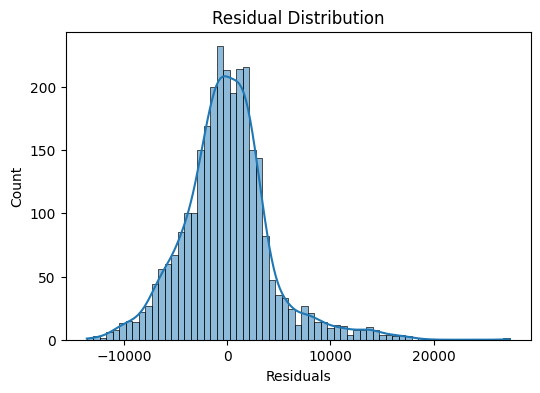

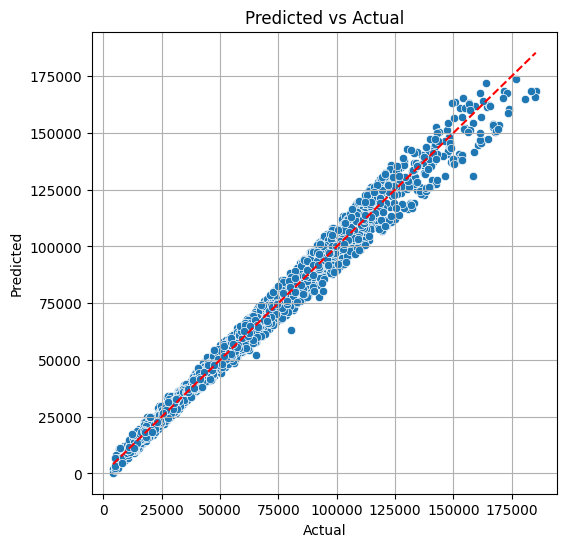

In [59]:

# Residual Plot
residuals = y_test - y_test_pred
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.show()

# Predicted vs Actual
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Predicted vs Actual")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid()
plt.show()


In [60]:
df.shape

(14516, 21)